# Exercise 7 : Removing Highly Correlated Features (Tokens)

Remove highly correlated words from tf-idf matrix representation of sklearn's “The 20 newsgroups text dataset”

In [2]:
from sklearn.datasets import fetch_20newsgroups
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from pylab import *
import nltk
import warnings
warnings.filterwarnings('ignore')

In [3]:
stop_words = stopwords.words('english')

#adding individual printable characters to list of wtop words so that they get renoved along with the stopwords
stop_words = stop_words + list(string.printable)

In [4]:
lemmatizer = WordNetLemmatizer()

In [5]:
categories= ['misc.forsale', 'sci.electronics', 'talk.religion.misc']
news_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, download_if_missing=True)

In [6]:
news_data_df = pd.DataFrame({'text' : news_data['data'], 'category': news_data.target})
news_data_df.head()

,text,category
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0


In [7]:
news_data_df['cleaned_text'] = news_data_df['text'].apply(\
lambda x : ' '.join([lemmatizer.lemmatize(word.lower()) \
    for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', str(x))) if word.lower() not in stop_words]))

In [13]:
tfidf_model = TfidfVectorizer(max_features=20)
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(news_data_df['cleaned_text']).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,00,article,com,edu,good,host,know,like,line,new,nntp,one,organization,posting,sale,subject,university,use,would,writes
0,0.719664,0.000000,0.000000,0.191683,0.0,0.124066,0.000000,0.153294,0.066931,0.520927,0.124370,0.0,0.068809,0.120711,0.161624,0.066888,0.255410,0.0,0.00000,0.000000
1,0.000000,0.000000,0.000000,0.219265,0.0,0.000000,0.353598,0.350704,0.153124,0.000000,0.000000,0.0,0.157421,0.000000,0.739523,0.153025,0.292162,0.0,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.853563,0.0,0.000000,0.000000,0.000000,0.298044,0.000000,0.000000,0.0,0.306407,0.000000,0.000000,0.297852,0.000000,0.0,0.00000,0.000000
3,0.000000,0.267175,0.255208,0.567867,0.0,0.245034,0.000000,0.302760,0.132190,0.000000,0.245634,0.0,0.135900,0.238407,0.000000,0.132105,0.252221,0.0,0.28648,0.270283
4,0.000000,0.000000,0.000000,0.411807,0.0,0.266541,0.000000,0.000000,0.143793,0.000000,0.267194,0.0,0.147828,0.259333,0.694459,0.143700,0.274358,0.0,0.00000,0.000000


In [14]:
correlation_matrix = tfidf_df.corr()
correlation_matrix.head()

,00,article,com,edu,good,host,know,like,line,new,nntp,one,organization,posting,sale,subject,university,use,would,writes
00,1.000000,-0.113080,-0.081874,-0.116847,-0.053495,-0.078405,-0.096597,-0.084413,-0.161674,0.026696,-0.084632,-0.076635,-0.208121,-0.083772,0.054777,-0.188759,-0.105828,-0.076621,-0.094492,-0.127518
article,-0.113080,1.000000,0.125853,0.076146,-0.008246,-0.055519,0.025570,-0.000201,-0.158956,-0.121483,-0.046249,0.029978,-0.201204,-0.038486,-0.197164,-0.189810,-0.158022,0.035890,0.015507,0.572650
com,-0.081874,0.125853,1.000000,-0.471456,-0.016128,-0.178742,-0.036333,-0.037284,-0.110011,-0.071355,-0.175256,-0.037293,-0.084630,-0.168613,-0.131051,-0.114145,-0.368688,-0.035631,-0.010214,0.150258
edu,-0.116847,0.076146,-0.471456,1.000000,-0.098067,0.242610,-0.100041,-0.103703,-0.043210,-0.059893,0.247395,-0.119432,0.023394,0.225912,-0.003604,-0.019058,0.371798,-0.126742,-0.152644,0.017169
good,-0.053495,-0.008246,-0.016128,-0.098067,1.000000,-0.098199,0.025899,0.045106,-0.186943,-0.046803,-0.098198,0.074548,-0.166908,-0.089622,-0.115122,-0.176614,-0.101782,0.068633,0.087909,0.056725


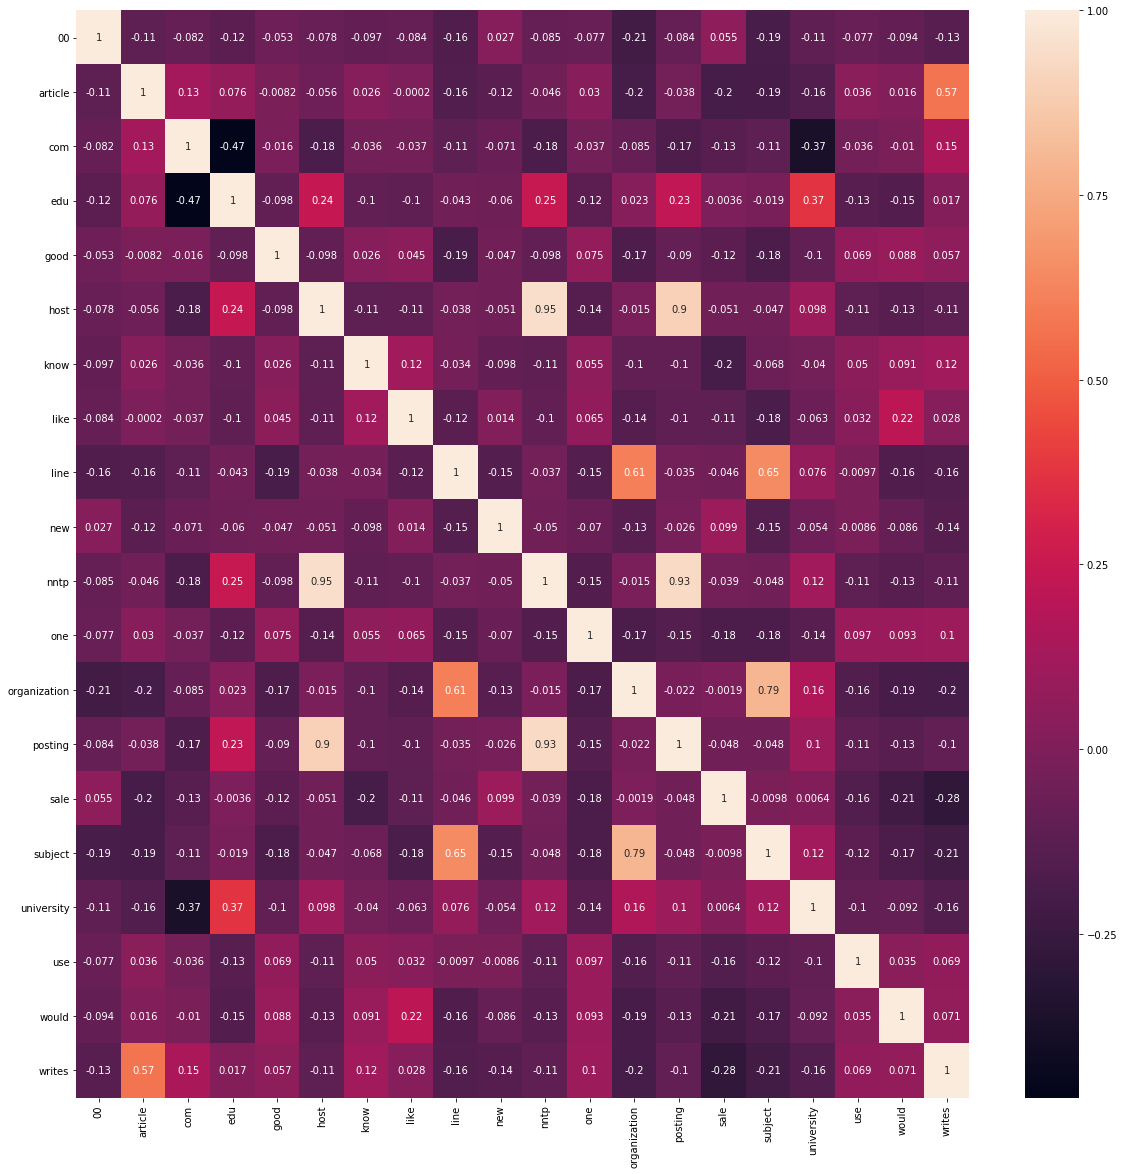

In [16]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlation_matrix,annot=True)

In [30]:
import numpy as np
correlation_matrix_ut = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape)).astype(np.bool))
correlation_matrix_melted = correlation_matrix_ut.stack().reset_index()
correlation_matrix_melted.columns = ['word1', 'word2', 'correlation']
correlation_matrix_melted[(correlation_matrix_melted['word1']!=\
                           correlation_matrix_melted['word2']) & (correlation_matrix_melted['correlation']>.7)]

,word1,word2,correlation
95,host,nntp,0.953828
98,host,posting,0.896666
158,nntp,posting,0.934923
177,organization,subject,0.793946


Therefore the correlated words are : ('host', 'nntp'), ('host', 'posting'), ('nntp', 'posting'), ('organization', 'subject'). Let's create a new dataframe removinf these correlated words.

In [37]:
tfidf_df_without_correlated_word = tfidf_df.drop(['nntp', 'posting', 'organization'], axis = 1)
tfidf_df_without_correlated_word.head()

,00,article,com,edu,good,host,know,like,line,new,one,sale,subject,university,use,would,writes
0,0.719664,0.000000,0.000000,0.191683,0.0,0.124066,0.000000,0.153294,0.066931,0.520927,0.0,0.161624,0.066888,0.255410,0.0,0.00000,0.000000
1,0.000000,0.000000,0.000000,0.219265,0.0,0.000000,0.353598,0.350704,0.153124,0.000000,0.0,0.739523,0.153025,0.292162,0.0,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.853563,0.0,0.000000,0.000000,0.000000,0.298044,0.000000,0.0,0.000000,0.297852,0.000000,0.0,0.00000,0.000000
3,0.000000,0.267175,0.255208,0.567867,0.0,0.245034,0.000000,0.302760,0.132190,0.000000,0.0,0.000000,0.132105,0.252221,0.0,0.28648,0.270283
4,0.000000,0.000000,0.000000,0.411807,0.0,0.266541,0.000000,0.000000,0.143793,0.000000,0.0,0.694459,0.143700,0.274358,0.0,0.00000,0.000000
